## Logistic Regression for Handwritten Digits Classfication


### Handwritten Digits Classification using Logistic Regression with Gradient Ascent Algorithm

Difference between Gradient Descent and Gradient Ascent

To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.

The equation to update the logistic regression model parameters are:    


\begin{equation}
\theta^{+} = \theta^{-} + \alpha (y_{i} - h(x_{i}) )\bar{x}
\end{equation}

This maximizes the following log likelihood function

\begin{equation}
J(x, \theta, y) = \sum_{i=1}^{m}y_i\log(h(x_{i})) + (1 - y_i)\log(1 - h(x_{i}))
\end{equation}

where our hypothesis is a sigmoid function
\begin{equation}
h(x_i) = \frac{1}{1 + e^{\theta^T \bar{x}}}
\end{equation}

### Batch gradient Ascent
```FOR j FROM 0 -> max_iteration: 
    FOR i FROM 0 -> m: 
        theta += (alpha) * (y[i] - h(x[i])) * x_bar
    ENDLOOP
ENDLOOP
```

### Multi-class Classificaton with one-vs-all (one-vs-rest)
If you have n-classes, we train n-classifiers and given a new data point we predict using all the classifiers and choose the one with the highest probability

In [ ]:
# Do not change anything in this cell.
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

We already have the dataset ready for you. Here is a look at your dataset.

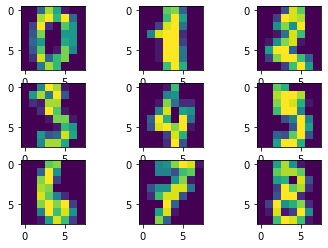

In [ ]:
# Do not change anything in this cell.
digits = load_digits()

f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(digits.images[0])
axarr[0,1].imshow(digits.images[1])
axarr[0,2].imshow(digits.images[2])
axarr[1,0].imshow(digits.images[3])
axarr[1,1].imshow(digits.images[4])
axarr[1,2].imshow(digits.images[5])
axarr[2,0].imshow(digits.images[6])
axarr[2,1].imshow(digits.images[7])
axarr[2,2].imshow(digits.images[8])
plt.show()

In [ ]:
# Write code in this cell to build your Logistic Regression Model
class LogisticRegression():
    """Class for training and using a model for logistic regression"""
    
    def set_values(self, initial_params, alpha=0.01, max_iter=5000, class_of_interest=0):
        """Set the values for initial params, step size, maximum iteration, and class of interest"""
        self.params = initial_params
        self.alpha = alpha
        self.max_iter = max_iter
        self.class_of_interest = class_of_interest
    
    @staticmethod
    def _sigmoid(x):
        """Sigmoide function"""  
        return 1.0 / (1.0 + np.exp(-x))
    
    def predict(self, x_bar, params):
        """predict the probability of a class"""  
                
        return self._sigmoid(np.dot(params, x_bar))
    
    def _compute_cost(self, input_var, output_var, params):
        """Compute the log likelihood cost"""
        
        cost = 0  # Initialize the cost
        input_var_with_1 = np.append(input_var, np.ones((input_var.shape[0], 1)), axis=1)
        # Small constant, avoid log(0)
        c = 0.0001
        for x, y in zip(input_var_with_1, output_var):
            #x_bar = np.append(x, 1)
            x_bar = x
            y_hat = y
            h = self.predict(x_bar, self.params)
            y_binary = int(y_hat == self.class_of_interest)  # Return 1 if "y" equals class of interest and 0 otherwise
            cost += y_binary * np.log(h + c) + (1 - y_binary) * np.log(1 - h + c)

        return cost
    
    def train(self, input_var, label, print_iter = 5000):
        """Train the model using batch gradient ascent"""
        
        iteration = 1
        input_var_with_1 = np.append(input_var, np.ones((input_var.shape[0], 1)), axis=1)
        while iteration < self.max_iter:
            if iteration % print_iter == 0:
                print(f'iteration: {iteration}')
                print(f'cost: {self._compute_cost(input_var, label, self.params)}')
                print('--------------------------------------------')

            for i, xy in enumerate(zip(input_var_with_1, label)):
                #x_bar = np.append(xy[0], 1)
                x_bar = xy[0]
                y_hat = xy[1]
                h = self.predict(x_bar, self.params)
                y_binary = int(y_hat == self.class_of_interest) # Return 1 if xy[1] equals class of interest and 0 otherwise
                gradient = y_binary - h
                self.params += self.alpha * gradient * x_bar

            iteration += 1

        return self.params

    def test(self, input_test, label_test):
        """Test the accuracy of the model using test data"""
        # Note* You can write your own approach to test, this is just one approach
        self.total_classifications = 0
        self.correct_classifications = 0
        input_test_with_1 = np.append(input_test, np.ones((input_test.shape[0], 1)), axis=1)
        for x, y in zip(input_test_with_1, label_test):
            self.total_classifications += 1
            #x_bar = np.append(x, 1)
            x_bar = x
            y_hat = y
            #h = self._sigmoid(np.dot(self.params, x_bar))
            h = self.predict(x_bar, self.params)
            y_binary = int(y_hat == self.class_of_interest)

            # If predict is the class of interest and y is also class of interest
            if h >= 0.5 and y_binary == 1:
                # correct classification of class_of_interest
                self.correct_classifications += 1

            # If predict is not the class of interest and y is also not class of interest
            if h < 0.5 and y_binary != 1:
                # correct classification of an other class
                self.correct_classifications += 1

        self.accuracy = self.correct_classifications / self.total_classifications

        return self.accuracy

In [ ]:
# Do not change anything in this cell
digits_train, digits_test, digits_label_train, digits_label_test =\
train_test_split(digits.data, digits.target, test_size=0.20)

In [ ]:
# train a classifier for the ZERO digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_0 = LogisticRegression() # Initialize the class
digits_regression_model_0.set_values(params_0, alpha, max_iter, 0) # set initial values

params = digits_regression_model_0.train(digits_train / 16, digits_label_train, 1000) # Train the model

iteration: 1000
cost: -1.7297370086184407
--------------------------------------------
iteration: 2000
cost: -0.9029669155935015
--------------------------------------------
iteration: 3000
cost: -0.5900440081773833
--------------------------------------------
iteration: 4000
cost: -0.42357168312754295
--------------------------------------------
iteration: 5000
cost: -0.3197124413777849
--------------------------------------------
iteration: 6000
cost: -0.2485348842185021
--------------------------------------------
iteration: 7000
cost: -0.19661969580873206
--------------------------------------------
iteration: 8000
cost: -0.15703291342916925
--------------------------------------------
iteration: 9000
cost: -0.1258228795182585
--------------------------------------------


In [ ]:
# accuracy
digits_accuracy = digits_regression_model_0.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ZERO digit in test set: {digits_accuracy}')

Accuracy of prediciting a ZERO digit in test set: 1.0


In [ ]:
# train a classifier for the ONE digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_1 = LogisticRegression() # Initialize the class
digits_regression_model_1.set_values(params_0, alpha, max_iter, 1) # set initial values

params = digits_regression_model_1.train(digits_train / 16, digits_label_train, 1000) # Train the model

iteration: 1000
cost: -34.77962747728378
--------------------------------------------
iteration: 2000
cost: -28.124291754898763
--------------------------------------------
iteration: 3000
cost: -24.62730505737384
--------------------------------------------
iteration: 4000
cost: -22.32520031564121
--------------------------------------------
iteration: 5000
cost: -20.638747737705177
--------------------------------------------
iteration: 6000
cost: -19.320307648299348
--------------------------------------------
iteration: 7000
cost: -18.243888508011278
--------------------------------------------
iteration: 8000
cost: -17.337619832760875
--------------------------------------------
iteration: 9000
cost: -16.55697277170131
--------------------------------------------


In [ ]:
#accuracy
digits_accuracy = digits_regression_model_1.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a ONE digit in test set: {digits_accuracy}')

Accuracy of prediciting a ONE digit in test set: 0.9805555555555555


In [ ]:
# train a classifier for the TWO digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_2 = LogisticRegression() # Initialize the class
digits_regression_model_2.set_values(params_0, alpha, max_iter, 2) # set initial values

params = digits_regression_model_2.train(digits_train / 16, digits_label_train, 1000) # Train the model

iteration: 1000
cost: -2.626712096120883
--------------------------------------------
iteration: 2000
cost: -1.385432770398814
--------------------------------------------
iteration: 3000
cost: -0.9246368715530282
--------------------------------------------
iteration: 4000
cost: -0.6812613840724624
--------------------------------------------
iteration: 5000
cost: -0.5299661056524817
--------------------------------------------
iteration: 6000
cost: -0.4264876777128916
--------------------------------------------
iteration: 7000
cost: -0.3511036101217419
--------------------------------------------
iteration: 8000
cost: -0.2936633182478642
--------------------------------------------
iteration: 9000
cost: -0.24839776470809544
--------------------------------------------


In [ ]:
digits_accuracy = digits_regression_model_2.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a TWO digit in test set: {digits_accuracy}')

Accuracy of prediciting a TWO digit in test set: 0.9972222222222222


In [ ]:
# train a classifier for the EIGHT digit
alpha = 1e-2
params_0 = np.zeros(len(digits.data[0]) + 1)

max_iter = 10000
digits_regression_model_8 = LogisticRegression() # Initialize the class
digits_regression_model_8.set_values(params_0, alpha, max_iter, 8) # set initial values

params = digits_regression_model_8.train(digits_train / 16, digits_label_train, 1000) # Train the model

iteration: 1000
cost: -78.08002168159048
--------------------------------------------
iteration: 2000
cost: -74.2638082454134
--------------------------------------------
iteration: 3000
cost: -72.74890597797143
--------------------------------------------
iteration: 4000
cost: -71.93427300603462
--------------------------------------------
iteration: 5000
cost: -71.419110547916
--------------------------------------------
iteration: 6000
cost: -71.05361853756747
--------------------------------------------
iteration: 7000
cost: -70.77052551851257
--------------------------------------------
iteration: 8000
cost: -70.53625632755923
--------------------------------------------
iteration: 9000
cost: -70.33284385801225
--------------------------------------------


In [ ]:
digits_accuracy = digits_regression_model_8.test(digits_test / 16.0, digits_label_test)
print(f'Accuracy of prediciting a EIGHT digit in test set: {digits_accuracy}')

Accuracy of prediciting a EIGHT digit in test set: 0.9527777777777777
